In [1]:
#Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read in data

In [2]:
#Read in original data sets (ignore warninigs)

users = pd.read_csv('users.dat', sep='::', names=['user_id','gender','age', 'occupation', 'zipcode'])

ratings = pd.read_csv('ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'rating_timestamp'])
ratings["rating_timestamp"] = pd.to_datetime(ratings["rating_timestamp"], unit='s')

movies = pd.read_csv('movies.dat', sep='::', header=None, names=['movie_id', 'movie_title', 'genres'])

<ipython-input-2-2a5916a71cf0>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('users.dat', sep='::', names=['user_id','gender','age', 'occupation', 'zipcode'])
<ipython-input-2-2a5916a71cf0>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'rating_timestamp'])
<ipython-input-2-2a5916a71cf0>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warnin

# Initial glance of the data sets

In [3]:
#Get a glimpse of each data sets
print("Movies Data Set:")
print(movies.count(),'\n')
print("Users Data Set:")
print(users.count(), '\n')
print("Ratings Data Set:")
print(ratings.count(), '\n')

#Ratings data set > users data set -> some users have multiple reviews
#Verify there are the same numebr of unique user_id values in the ratings data set as the users data set
print("Are there the same number of unique user_id values in ratings data set as users data set? ", users['user_id'].nunique() == ratings['user_id'].nunique())
print("Number of unique user_id values in users data set and ratings data set:", ratings['user_id'].nunique())

Movies Data Set:
movie_id       3883
movie_title    3883
genres         3883
dtype: int64 

Users Data Set:
user_id       6040
gender        6040
age           6040
occupation    6040
zipcode       6040
dtype: int64 

Ratings Data Set:
user_id             1000209
movie_id            1000209
rating              1000209
rating_timestamp    1000209
dtype: int64 

Are there the same number of unique user_id values in ratings data set as users data set?  True
Number of unique user_id values in users data set and ratings data set: 6040


### Look for duplicate entries or missing values in the movies data set

In [4]:
#Display first 5 rows of movie data set
movies.head()

,movie_id,movie_title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     3883 non-null   int64 
 1   movie_title  3883 non-null   object
 2   genres       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
#Same number of unique movie ids and movie titles -> no duplicate entries
print("Count values for movie data set:")
print(movies.count(),'\n')
print("Number unique movie ids:", movies['movie_id'].nunique())
print("Number unique movie titles:", movies['movie_title'].nunique(),'\n')

#No missing values in movie data set
print("Number of Nans in movie data set:")
print(movies.isna().sum())

#No duplicate entries & no missing values -> cleaned data set despite what "File Descriptions.docx" says

Count values for movie data set:
movie_id       3883
movie_title    3883
genres         3883
dtype: int64 

Number unique movie ids: 3883
Number unique movie titles: 3883 

Number of Nans in movie data set:
movie_id       0
movie_title    0
genres         0
dtype: int64


In [7]:
#Number of unique values in each column of movies data set
print("Number of unique values in each column of movies data set:")
print(movies.nunique(),'\n')

#Number of rows in movies data set
print("Number of rows in movie data set:", movies.shape[0])

Number of unique values in each column of movies data set:
movie_id       3883
movie_title    3883
genres          301
dtype: int64 

Number of rows in movie data set: 3883


### Look for naming inconsistencies in movie_id of movies data set

In [8]:
#Look for naming inconsistencies in movie_id
for row in range(movies.shape[0]):
    id_num = movies.iloc[row,0]
    if(id_num != row + 1):
        print("Inconsistency found!")
        print("movie_id value:", id_num)
        print("row number:", row)
        break

Inconsistency found!
movie_id value: 92
row number: 90


In [9]:
#Inspect the row the inconsistency was found on and the surrounding rows
movies.iloc[85:95]

,movie_id,movie_title,genres
85,86,White Squall (1996),Adventure|Drama
86,87,Dunston Checks In (1996),Children's|Comedy
87,88,Black Sheep (1996),Comedy
88,89,Nick of Time (1995),Action|Thriller
89,90,"Journey of August King, The (1995)",Drama
90,92,Mary Reilly (1996),Drama|Thriller
91,93,Vampire in Brooklyn (1995),Comedy|Romance
92,94,Beautiful Girls (1996),Drama
93,95,Broken Arrow (1996),Action|Thriller
94,96,In the Bleak Midwinter (1995),Comedy


In [10]:
#Inspect end of movies data set to see if naming inconsistency is consistent (it's not)
movies.tail()

,movie_id,movie_title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


Even though the movie_id values are inconsistent, none are missing (no nans) and there aren't any duplicate values. This combined with the fact that the movie_id is qualitative data anyways means we can ignore the inconsistencies so long as they translate over to the ratings data set.

### Look at users data set

In [11]:
#Display first 5 rows of users data set
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
#Number of unique values in each column of users data set
print("Number of unique values in each column of users data set:")
print(users.nunique(),'\n')

#Number of missing values in users data set
print("Number of missing values in each column of users data set:")
print(users.isna().sum())

Number of unique values in each column of users data set:
user_id       6040
gender           2
age              7
occupation      21
zipcode       3439
dtype: int64 

Number of missing values in each column of users data set:
user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64


### Look at ratings data set

In [13]:
#Display first 5 rows of ratings data set
ratings.head()

,user_id,movie_id,rating,rating_timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [14]:
#Check if there are any missing values in ratings data set
ratings.isna().sum()

user_id             0
movie_id            0
rating              0
rating_timestamp    0
dtype: int64

In [15]:
#Count number of unique values in each column of the ratings data set
ratings.nunique()

user_id               6040
movie_id              3706
rating                   5
rating_timestamp    458455
dtype: int64

# Briefly explore release year data

In [16]:
#Function to extract a substring from a string
def substr(string, start, length):
    chars = list(string)
    sub = ""
    if (len(string) - start) >= length:
        for i in range(length):
            sub = sub + str(chars[start + i])
        return sub
    raise Exception("Length of substring is too long")

In [17]:
#Create a data frame consisting of only movie_id and genre
adj_movies = movies.drop('movie_title', axis = 1)
adj_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   genres    3883 non-null   object
dtypes: int64(1), object(1)
memory usage: 60.8+ KB


In [18]:
#Create a list of movie titles with the release year removed from the title

titles =  movies["movie_title"].copy()
year = [None] * len(titles)            #Create a list for the release year of the movies
for i in range(len(titles)):
    title = titles[i]
    j = 0
    while j < (len(title) - 3):   #Parse title's value
        #Following if statements check if a substring matches the regex of a 4 digit integer contained within parentheses (ex: "(1995)")
        if substr(title, j, 4).isdigit() == True: #Search for a substring that consists of 4 consecutive integers
            if substr(title, j - 1, 1) == "(" and substr(title, j+4, 1) == ")":   #Check if the 4 consecutive integers are contained within parentheses
                year[i] = substr(title, j, 4).strip()  #Strip white spaces from the substring and store in the year list
                titles[i] = titles[i].replace("(" + year[i] + ")", " ").strip() #Remove the release year from the title's value and replace it with a single space
                break
        j = j + 1

In [19]:
#Add 'movie title' and 'year' lists as columns to the adj_movies data frame
adj_movies["movie title"] = titles
adj_movies["year"] = year

#Display a sample of the adj_movies data frame
adj_movies.sample(10)

,movie_id,genres,movie title,year
1192,1210,Action|Adventure|Romance|Sci-Fi|War,Star Wars: Episode VI - Return of the Jedi,1983
3130,3199,Comedy|Musical|Romance,Pal Joey,1957
3178,3247,Comedy|Crime,Sister Act,1992
3124,3193,Documentary,Creature,1999
2369,2438,Drama|Thriller,Outside Ozona,1998
1536,1577,Drama,Mondo,1996
2476,2545,Comedy,Relax... It's Just Sex,1998
833,844,Drama,"Story of Xinghua, The",1993
809,820,Drama,"Death in the Garden (Mort en ce jardin, La)",1956
2657,2726,Crime|Film-Noir,"Killing, The",1956


In [20]:
#Find the oldest and newest movie in the movies data set
print("Oldest release year:",min(adj_movies["year"])) 
print("Most recent release year:",max(adj_movies["year"])) 

Oldest release year: 1919
Most recent release year: 2000


In [21]:
#Find number of movies released each year
adj_movies["year"].value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1929      3
1923      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

# Calculate average rating for each movie 

In [22]:
#Clean the movies data frame of any missing values or duplicate entries (if any exist)
nmovies = movies.dropna(how='any', subset=['movie_id'])
nmovies = movies.drop_duplicates(subset=['movie_id'], keep='first', inplace=False, ignore_index=False)

#Display first 5 rows of nmovies
print(nmovies.head(),'\n')

#Get value counts 
nmovies['genres'].value_counts()

   movie_id                         movie_title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy 



Drama                                    843
Comedy                                   521
Horror                                   178
Comedy|Drama                             162
Comedy|Romance                           142
                                        ... 
Action|Adventure|Crime|Thriller            1
Action|Drama|Mystery|Romance|Thriller      1
Drama|Fantasy|Romance|Thriller             1
Musical|Romance|War                        1
Action|Adventure|Children's                1
Name: genres, Length: 301, dtype: int64

In [23]:
# Storing each genre individually to account for multi-genre movies

action = nmovies[nmovies['genres'].str.contains("Action")]
adventure = nmovies[nmovies['genres'].str.contains("Adventure")]
animation = nmovies[nmovies['genres'].str.contains("Animation")]
childrens = nmovies[nmovies['genres'].str.contains("Children's")]
comedy = nmovies[nmovies['genres'].str.contains("Comedy")]
crime = nmovies[nmovies['genres'].str.contains("Crime")]
documentary = nmovies[nmovies['genres'].str.contains("Documentary")]
drama = nmovies[nmovies['genres'].str.contains("Drama")]
fantasy = nmovies[nmovies['genres'].str.contains("Fantasy")]
filmNoir = nmovies[nmovies['genres'].str.contains("Film-Noir")]
horror = nmovies[nmovies['genres'].str.contains("Horror")]
musical = nmovies[nmovies['genres'].str.contains("Musical")]
mystery = nmovies[nmovies['genres'].str.contains("Mystery")]
romance = nmovies[nmovies['genres'].str.contains("Romance")]
sciFi = nmovies[nmovies['genres'].str.contains("Sci-Fi")]
thriller = nmovies[nmovies['genres'].str.contains("Thriller")]
war = nmovies[nmovies['genres'].str.contains("War")]
western = nmovies[nmovies['genres'].str.contains("Western")]

#Display action data frame to quickly check result
action

,movie_id,movie_title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action
...,...,...,...
3807,3877,Supergirl (1984),Action|Adventure|Fantasy
3809,3879,"Art of War, The (2000)",Action
3819,3889,Highlander: Endgame (2000),Action|Adventure|Fantasy
3828,3898,Bait (2000),Action|Comedy


In [24]:
#Calculates average rating for all movies

ratings_mean = [None] * 3952 #Create a list of 3,952 elements initialized to None

#Calculate each movie's average rating and store the calculated value in the ratings_mean list
for i in range(len(adj_movies)):
    total = ratings.loc[ratings["movie_id"] == adj_movies["movie_id"][i]]["rating"].sum()
    count = ratings.loc[ratings["movie_id"] == adj_movies["movie_id"][i]]["rating"].count()
    if count != 0:
        ratings_mean[i] = round(total/count, 2)
    else:
        ratings_mean[i] = 0

#Function to return a value from the ratings_mean list        
def find_rating_mean(row):
    return ratings_mean[row["movie_id"]-1]

#Create a new column in the adj_movies data frame and fill with each movie's average rating
adj_movies['Mean Rating'] = adj_movies.apply(find_rating_mean, axis=1)

In [25]:
#Display first 5 rows of adj_movies data frame
adj_movies.head()

,movie_id,genres,movie title,year,Mean Rating
0,1,Animation|Children's|Comedy,Toy Story,1995,4.15
1,2,Adventure|Children's|Fantasy,Jumanji,1995,3.20
2,3,Comedy|Romance,Grumpier Old Men,1995,3.02
3,4,Comedy|Drama,Waiting to Exhale,1995,2.73
4,5,Comedy,Father of the Bride Part II,1995,3.01


# Find total number of movies in each genre

In [26]:
#Takes count of movies and stores it in the variable
action_count = action['movie_id'].count()
adventure_count = adventure['movie_id'].count()
animation_count = animation['movie_id'].count()
childrens_count = childrens['movie_id'].count()
comedy_count = comedy['movie_id'].count()
crime_count = crime['movie_id'].count()
documentary_count = documentary['movie_id'].count()
drama_count = drama['movie_id'].count()
fantasy_count = fantasy['movie_id'].count()
filmNoir_count = filmNoir['movie_id'].count()
horror_count = horror['movie_id'].count()
musical_count = musical['movie_id'].count()
mystery_count = mystery['movie_id'].count()
romance_count = romance['movie_id'].count()
sciFi_count = sciFi['movie_id'].count()
thriller_count = thriller['movie_id'].count()
war_count = war['movie_id'].count()
western_count = western['movie_id'].count()

In [27]:
#Create data frame of number of each genre of movie
movie_genres = pd.DataFrame({'Action':[action_count],'Adventure':[adventure_count],'Animation':[animation_count],"Children's":[childrens_count],'Comedy':[comedy_count],'Crime':[crime_count],'Documentary':[documentary_count],
                             'Drama':[drama_count],'Fantasy':[fantasy_count],'Film-Noir':[filmNoir_count],'Horror':[horror_count],'Musical':[musical_count],'Mystery':[mystery_count],'Romance':[romance_count],'Sci-Fo':[sciFi_count],
                             'Thriller':[thriller_count],'War':[war_count],'Western':[western_count],}) 
movie_genres.sample()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fo,Thriller,War,Western
0,503,283,105,251,1200,211,127,1603,68,44,343,114,106,471,276,492,143,68


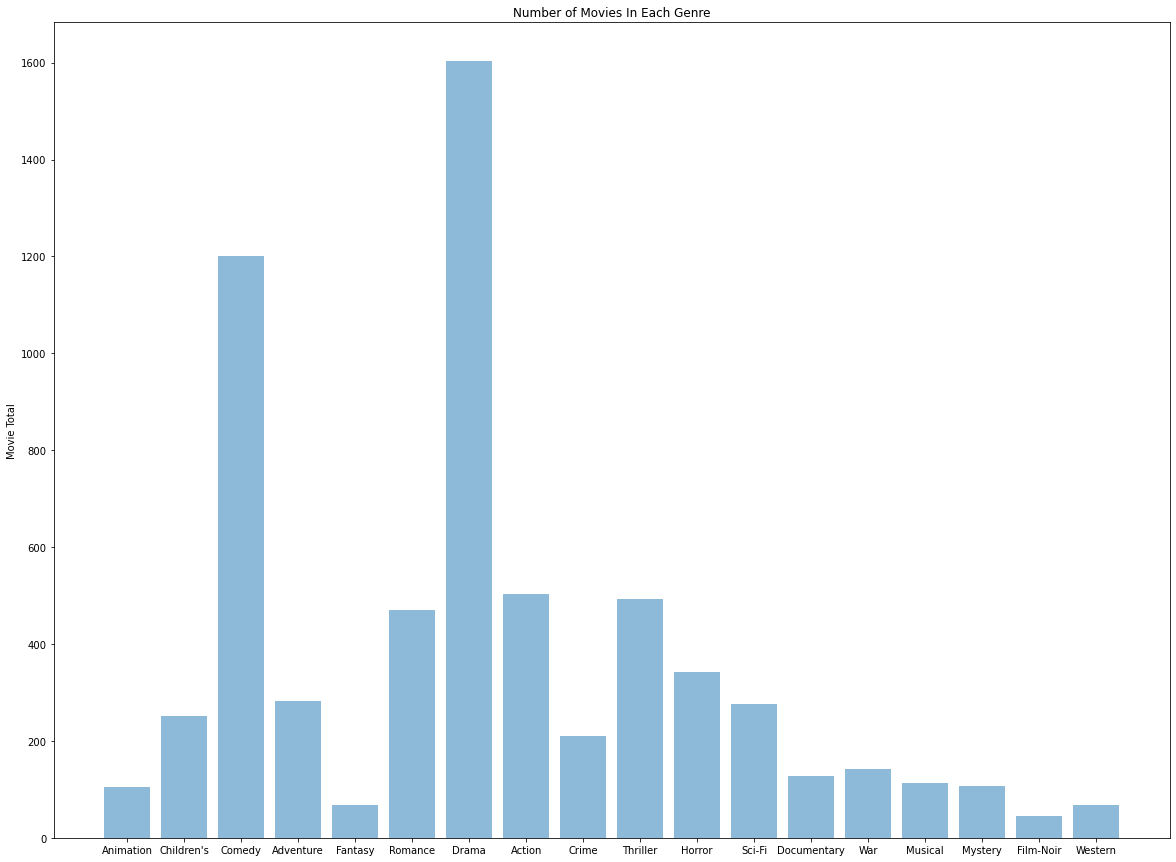

In [28]:
#Create bar graph of total number of movies in each genre
#https://pythonspot.com/matplotlib-bar-chart/


#Labels x and y axis and y positionining
movie_labels = ['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']
totals = [animation_count, childrens_count, comedy_count, adventure_count, fantasy_count, romance_count, drama_count, action_count, crime_count, 
          thriller_count, horror_count, sciFi_count, documentary_count, war_count, musical_count, mystery_count, filmNoir_count, western_count]
y_pos = np.arange(len(movie_labels))

#Creates bar chart
plt.figure(figsize=(20, 15))
plt.bar(y_pos, totals, align='center', alpha=0.5)
plt.xticks(y_pos, movie_labels)
plt.ylabel('Movie Total')
plt.title('Number of Movies In Each Genre')

plt.show()

([<matplotlib.patches.Wedge at 0x1a600b17df0>,
 [Text(1.1984103970059716, 0.06174560994912416, 'Animation'),
  Text(1.1694818372656386, 0.26890933845031567, "Children's"),
  Text(0.7102830464648535, 0.9672114525296971, 'Comedy'),
  Text(-0.11220368096773477, 1.1947427898829484, 'Adventure'),
  Text(-0.3151265790909334, 1.1578839489130357, 'Fantasy'),
  Text(-0.606611176072556, 1.0353853780423357, 'Romance'),
  Text(-1.1996537583461977, 0.028824643724464777, 'Drama'),
  Text(-0.6397901114542882, -1.0152185051925076, 'Action'),
  Text(-0.25283077740060056, -1.1730629130609356, 'Crime'),
  Text(0.1583809799426086, -1.1895021921763822, 'Thriller'),
  Text(0.6187514235109701, -1.0281763836536746, 'Horror'),
  Text(0.897732492893298, -0.7962891253832268, 'Sci-Fi'),
  Text(1.0365729019069443, -0.6045797044494765, 'Documentary'),
  Text(1.1072997697238989, -0.46247942653635987, 'War'),
  Text(1.1566390562534636, -0.31966559644274667, 'Musical'),
  Text(1.1843293524213356, -0.19329765904754195,

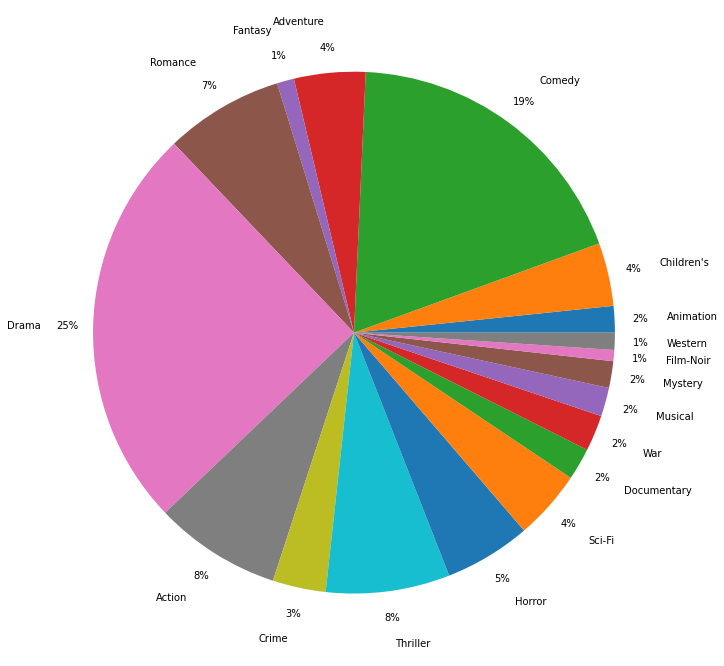

In [29]:
#Create pie chart of total number of movies in each genre
#https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart

plt.figure(figsize=(12, 12))
plt.pie(totals, labels=movie_labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

# Find the number of movies within each range of average ratings

In [30]:
#Find total number of movies within each range of average ratings

#Counter variables
onelower = 0
twolower = 0
threelower = 0
fourlower = 0
fivelower = 0

#Determine which range each mean rating falls in and increment the appropriate counter
for i in range(len(adj_movies)):
    if adj_movies.loc[i]["Mean Rating"] <= 1:    #Mean rating in range [0,1]
        onelower += 1
    elif adj_movies.loc[i]["Mean Rating"] <= 2:  #Mean rating in range (1,2]
        twolower += 1
    elif adj_movies.loc[i]["Mean Rating"] <= 3:  #Mean rating in range (3,4]
        threelower += 1
    elif adj_movies.loc[i]["Mean Rating"] <= 4:  #Mean rating in range (4,5]
        fourlower += 1
    else:
        fivelower +=1

#Display the total number of movies within each range of average ratings
print("There were",onelower,"movies with a rating between 0 to 1.")
print("There were",twolower,"movies with a rating between 1.01 to 2.")
print("There were",threelower,"movies with a rating between 2.01 to 3.")
print("There were",fourlower,"movies with a rating between 3.01 to 4.")
print("There were",fivelower,"movies with a rating between 4.01 to 5.")


There were 205 movies with a rating between 0 to 1.
There were 183 movies with a rating between 1.01 to 2.
There were 1014 movies with a rating between 2.01 to 3.
There were 2054 movies with a rating between 3.01 to 4.
There were 427 movies with a rating between 4.01 to 5.


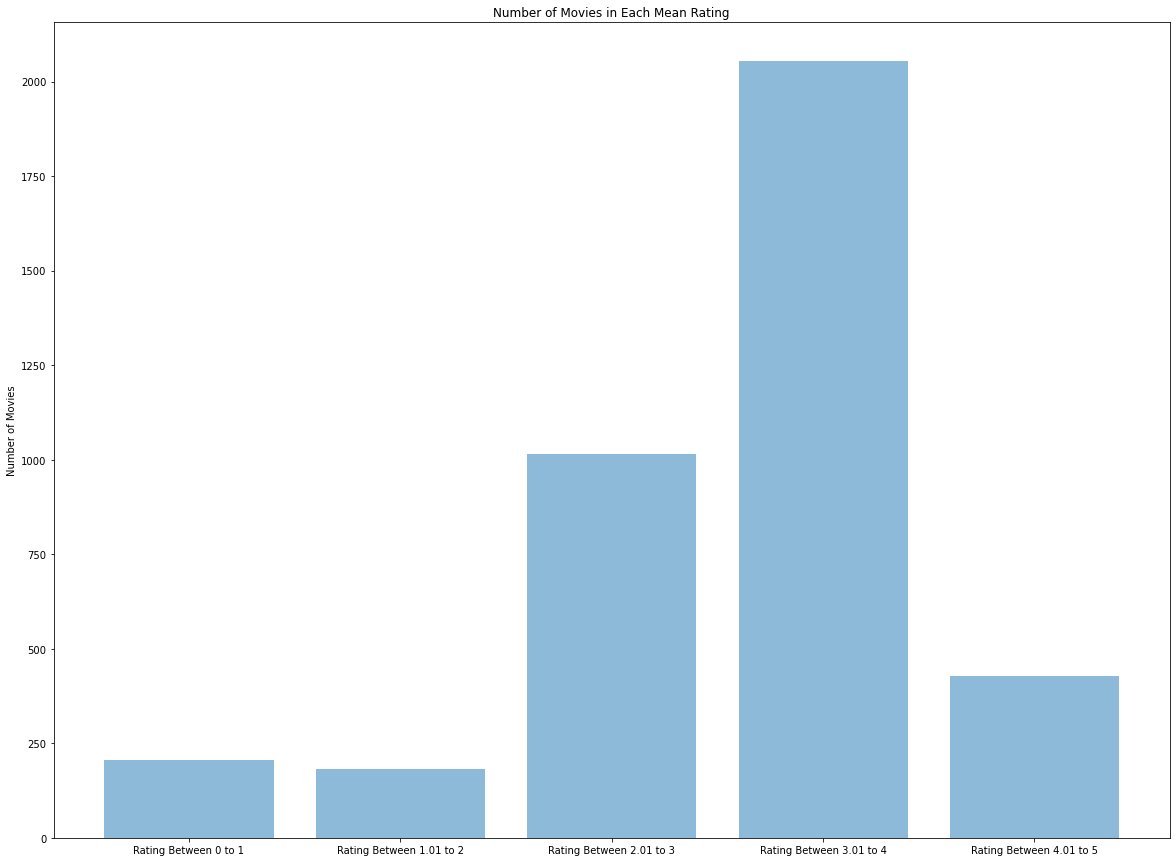

In [31]:
#Create bar graph of mean ratings
#https://pythonspot.com/matplotlib-bar-chart/

#Labels x and y axis and y positionining
mean_labels = ['Rating Between 0 to 1', 'Rating Between 1.01 to 2','Rating Between 2.01 to 3','Rating Between 3.01 to 4','Rating Between 4.01 to 5']
mean_ratings = [onelower, twolower, threelower, fourlower, fivelower]
y_pos = np.arange(len(mean_labels))

#Creates bar chart
plt.figure(figsize=(20, 15))
plt.bar(y_pos, mean_ratings, align='center', alpha=0.5)
plt.xticks(y_pos, mean_labels)
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Mean Rating')

plt.show()

([<matplotlib.patches.Wedge at 0x1a600bef220>,
 [Text(1.1835324816022417, 0.19811831059354237, 'Rating Between 0 to 1'),
  Text(1.0645188217593748, 0.5538950064046727, 'Rating Between 1.01 to 2'),
  Text(0.146719665931732, 1.1909967840548021, 'Rating Between 2.01 to 3'),
  Text(-0.8456054520227364, -0.8514407903720749, 'Rating Between 3.01 to 4'),
  Text(1.1290996753321267, -0.40636673481583807, 'Rating Between 4.01 to 5')],
 [Text(1.084904774802055, 0.18160845137741385, '5%'),
  Text(0.9758089199460936, 0.5077370892042834, '5%'),
  Text(0.1344930271040877, 1.0917470520502355, '26%'),
  Text(-0.7751383310208418, -0.780487391174402, '53%'),
  Text(1.0350080357211164, -0.37250284024785163, '11%')])

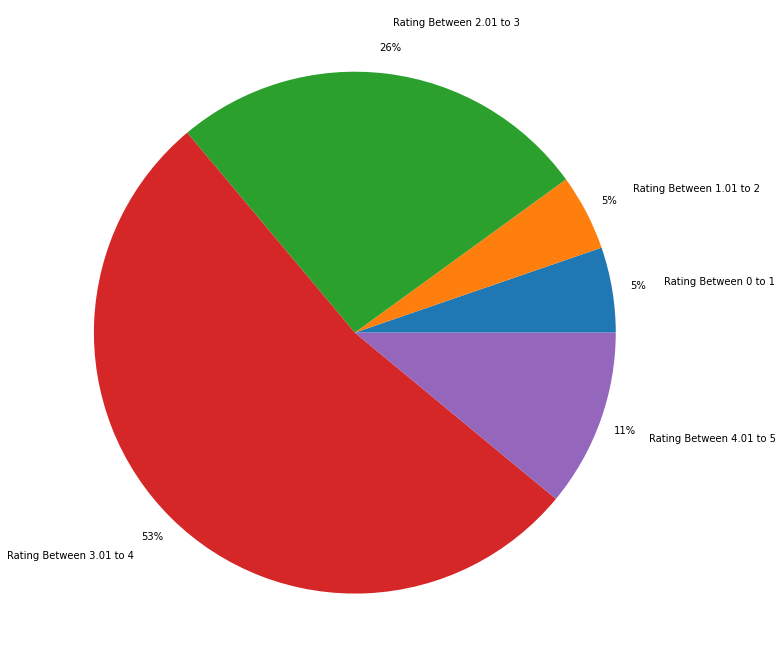

In [32]:
#Create a pie chart of mean ratings

#https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart
plt.figure(figsize=(12, 12))
plt.pie(mean_ratings, labels=mean_labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

# Find total number of movies watched per genre for each user_id

In [33]:
#Create list of data frames that correspond to each individual user_id (may take some time to finish)
user_ratings = list()
for user_num in ratings['user_id'].unique():
    temp_df = ratings[ratings.user_id == user_num]
    temp_df = pd.merge(temp_df, movies) #go ahead and merge the temp data frame and movies data frame since they're linked by movie_id
    user_ratings.append(temp_df)


In [34]:
#Check length (should be equal to number of unique user_id values)
print("Number of unique user_id values:",ratings['user_id'].nunique())
print("Number of data frames in user_ratings list:",len(user_ratings))

Number of unique user_id values: 6040
Number of data frames in user_ratings list: 6040


In [35]:
#How to view an individual data frame in the list
print("Data frame for user_id 1:")
user_ratings[0].head()

Data frame for user_id 1:


,user_id,movie_id,rating,rating_timestamp,movie_title,genres
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [36]:
#Create list of genres
genre_list = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

#Create list of column names
cols = [['user_id'], genre_list]
cols = [item for sublist in cols for item in sublist] #https://stackabuse.com/python-how-to-flatten-list-of-lists/

#Create new data frame of user_ids and total number of movies per genre that user watched
genres_watched = pd.DataFrame(index=np.arange(len(user_ratings)), columns = cols)
genres_watched['user_id'] = 0
for genre in genre_list:
    genres_watched[genre] = 0


In [37]:
#Display newly created data frame (should be filled with 0s)
genres_watched.head()

,user_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#Documentation for .at[] found at https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

#Count number of movies in each genre that each user saw and store in genres_watched data frame (may take some time to finish)
for df_index in range(len(user_ratings)):
    genres_watched.at[df_index,'user_id'] = user_ratings[df_index].at[0,'user_id']
    for genre in genre_list:
        genres_watched.at[df_index, genre] = user_ratings[df_index].genres.str.contains(genre).sum()

In [39]:
#Display filled data frame
genres_watched.head()

,user_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,5,5,18,20,14,2,0,21,3,0,0,14,0,6,3,3,2,0
1,2,56,19,0,0,25,12,0,79,1,1,2,0,3,24,17,31,15,3
2,3,23,25,3,3,30,0,0,8,2,0,3,1,1,5,6,5,2,6
3,4,19,6,0,1,0,1,0,6,2,0,3,0,0,2,9,4,3,2
4,5,31,9,4,6,56,21,6,104,0,3,10,3,8,30,15,39,6,1


In [40]:
#https://numpy.org/doc/stable/reference/generated/numpy.argmax.html  -> np.argmax() documentation
#https://numpy.org/doc/stable/reference/generated/numpy.argmin.html  -> np.argmin() documentation
#https://numpy.org/doc/stable/reference/generated/numpy.zeros.html   -> np.zeros() documentation

#Find most popular genre

#Create a numpy array the same length as the number of genres and fill it with zeros
genre_totals = np.zeros(len(genre_list)).astype(int)

#Sum the values in each column and save the total in the genre_totals numpy array
for index in range(len(genre_list)):
    genre_totals[index] = genres_watched[genre_list[index]].sum()
max_index = np.argmax(genre_totals) #Find the index of the element with the highest value
min_index = np.argmin(genre_totals) #Find the index of the elemnet with the lowest value
print("Most popular genre was", genre_list[max_index])
print("Least popular genre was", genre_list[min_index])

Most popular genre was Comedy
Least popular genre was Documentary


# Find the number of movies in each genre that each age group watched

In [41]:
#Create a list  of column names for the genres_watched_by_age data frame
cols = [['Age'], genre_list]
cols = [item for sublist in cols for item in sublist]

#Create and sort a numpy array consisting of unique age values from the users data set
ages = users['age'].unique()
ages.sort()

In [42]:
#Create a list of data frames where each data frame consists of all users that belong in the same age group
users_by_age = list()
    
for user_ages in users['age'].unique():
    temp_df = users[users.age == user_ages]
    temp_df = pd.merge(temp_df, ratings)
    temp_df = pd.merge(temp_df, movies)  #go ahead and merge the temp data frame and movies data frame since they're linked by movie_id
    users_by_age.append(temp_df)

In [43]:
#Create a new data frame with all columns except the Age column filled with 0s (Age filled with unique age values) 
genres_watched_by_age = pd.DataFrame(index=np.arange(len(users_by_age)), columns = cols )
genres_watched_by_age['Age'] = ages
for genre in genre_list:
    genres_watched_by_age[genre] = 0

In [44]:
#Display the newly created data frame
genres_watched_by_age

,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
#Fill the genres_watched_by_age data frame with each genre's total number of movies that each age group saw
for i in range(len(users_by_age)):
    for genre in genre_list:
        genres_watched_by_age .at[i, genre] = users_by_age[i].genres.str.contains(genre).sum()

#Create a new column in genres_watched_by_age and fill with the genre that had the most movies viewed by each age group
genres_watched_by_age['Most Common'] = genres_watched_by_age.idxmax(axis = 1)
genres_watched_by_age

,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Most Common
0,1,6578,3998,2449,4337,11162,1701,130,7483,1360,330,2211,1647,920,3599,4178,4824,1578,335,Comedy
1,18,8143,4488,1083,1888,11961,2974,260,17269,948,1207,1761,1889,2147,6279,4880,6537,3775,1333,Drama
2,25,105678,52633,16454,25743,143210,33030,3489,138695,14290,6539,31235,14705,15160,58003,63156,77429,24830,7053,Comedy
3,35,19357,10738,2889,5400,27890,6048,687,32141,2695,1860,6192,3898,3851,13283,13040,14933,6642,2133,Drama
4,45,17012,9090,2032,3890,23133,5520,555,29247,2127,1870,4681,3093,3520,11373,10674,13240,6314,2420,Drama
5,50,50503,26682,8117,14004,69244,14895,1708,71590,7006,4175,15122,8746,8179,29330,32333,36840,14514,4546,Drama
6,56,50186,26324,10269,16924,69980,15373,1081,58104,7875,2280,15184,7555,6401,25656,29033,35877,10874,2863,Comedy


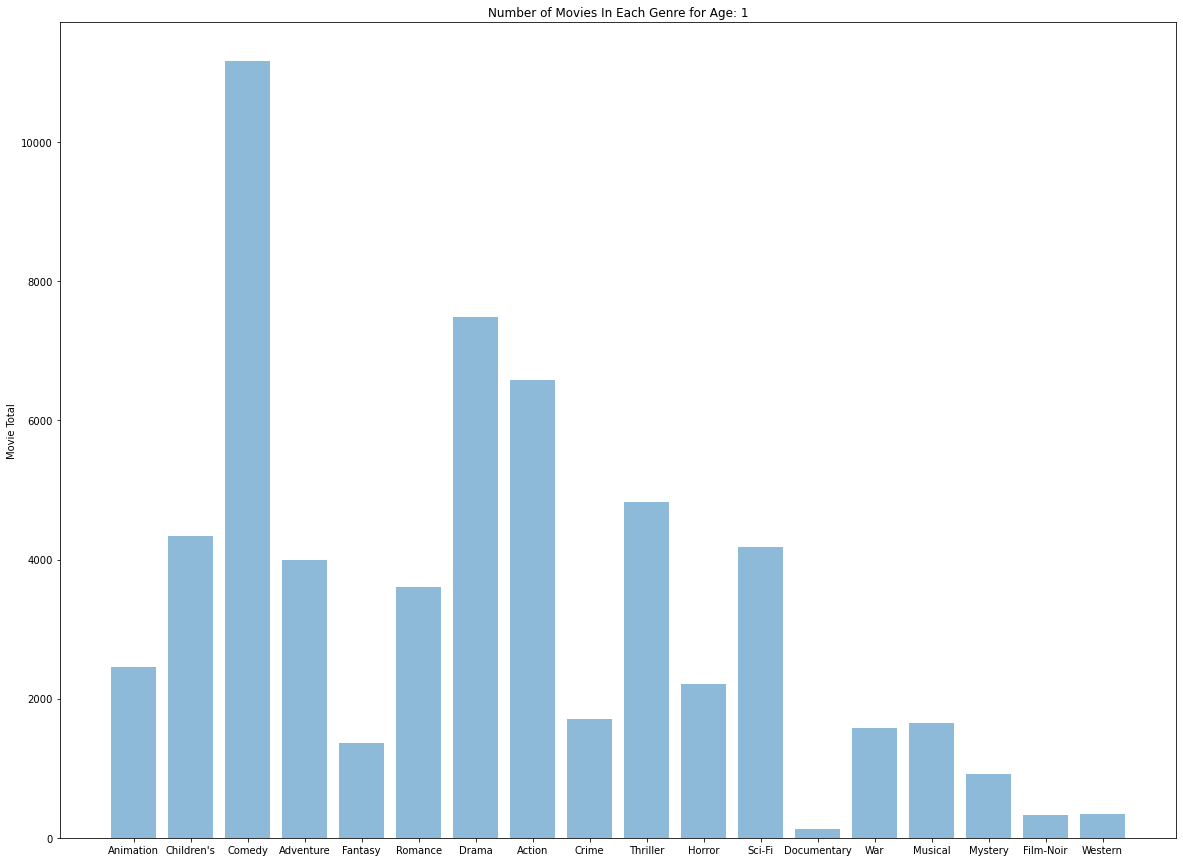

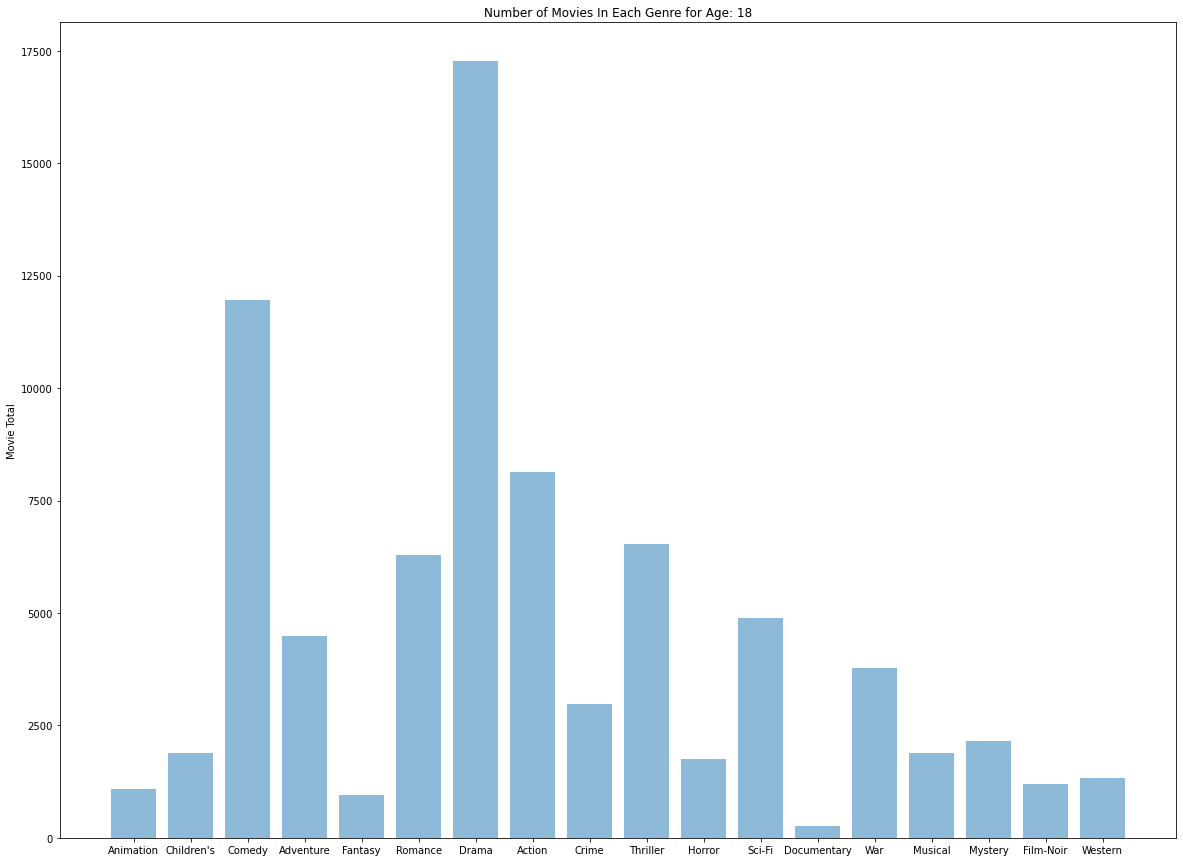

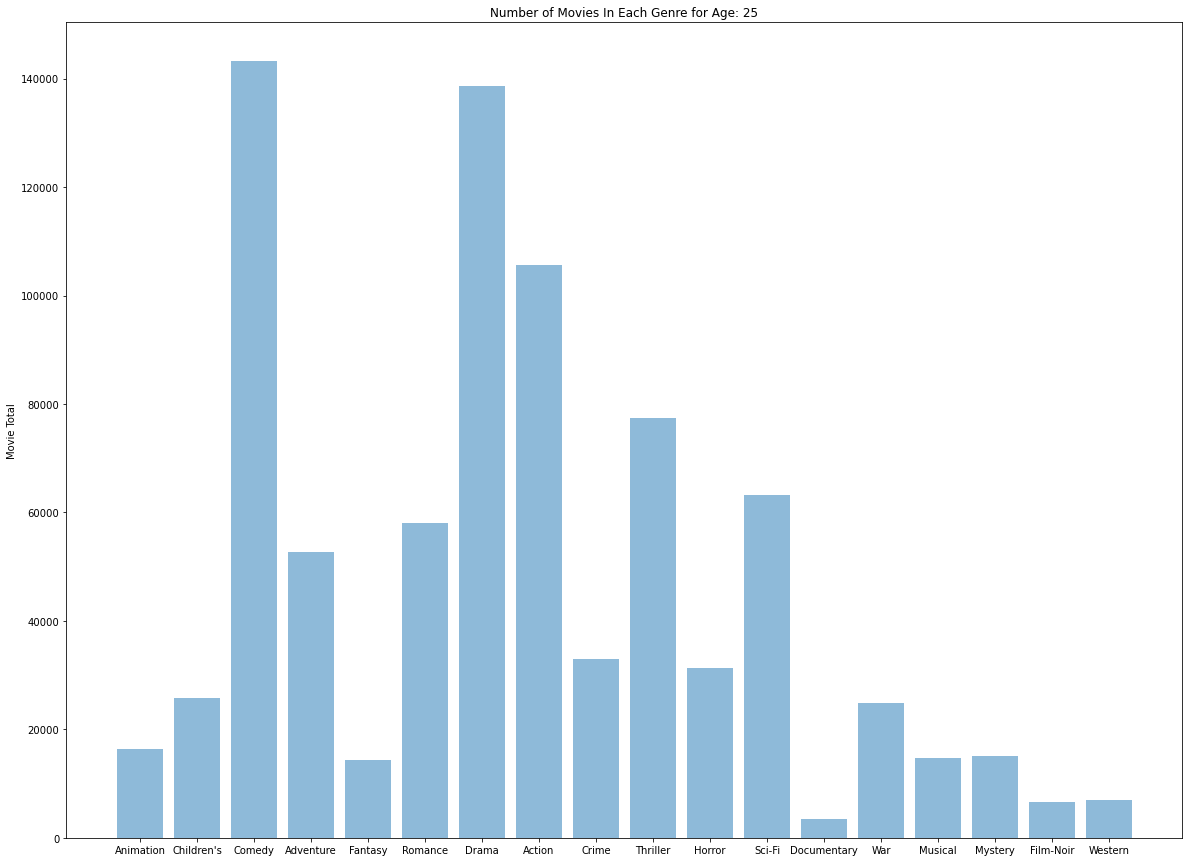

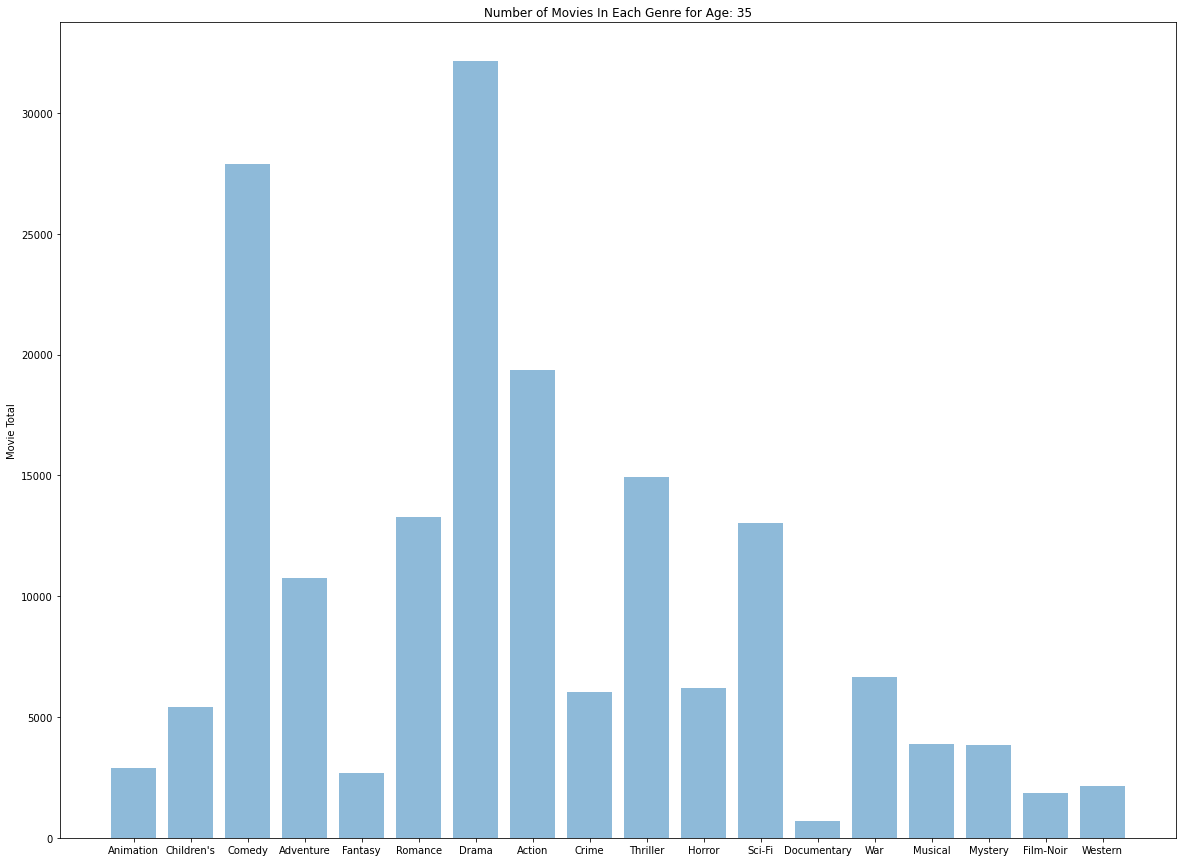

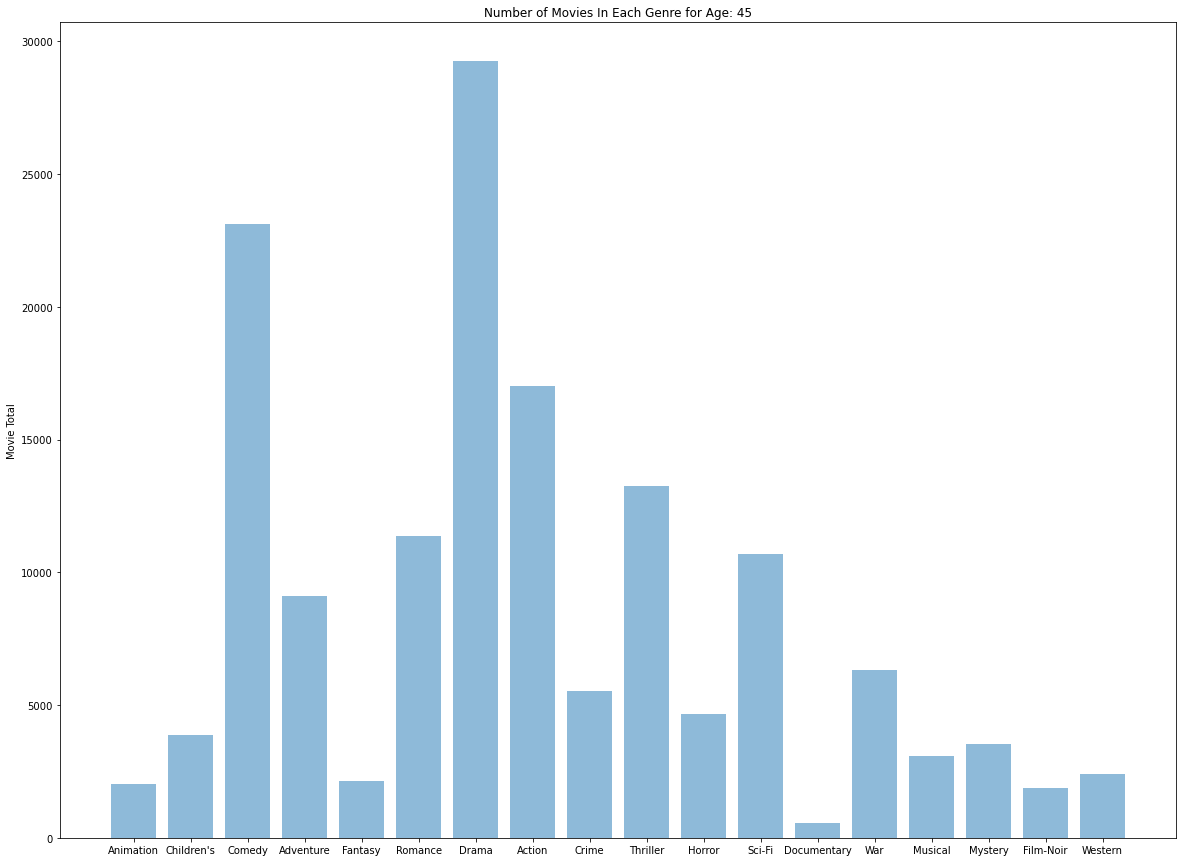

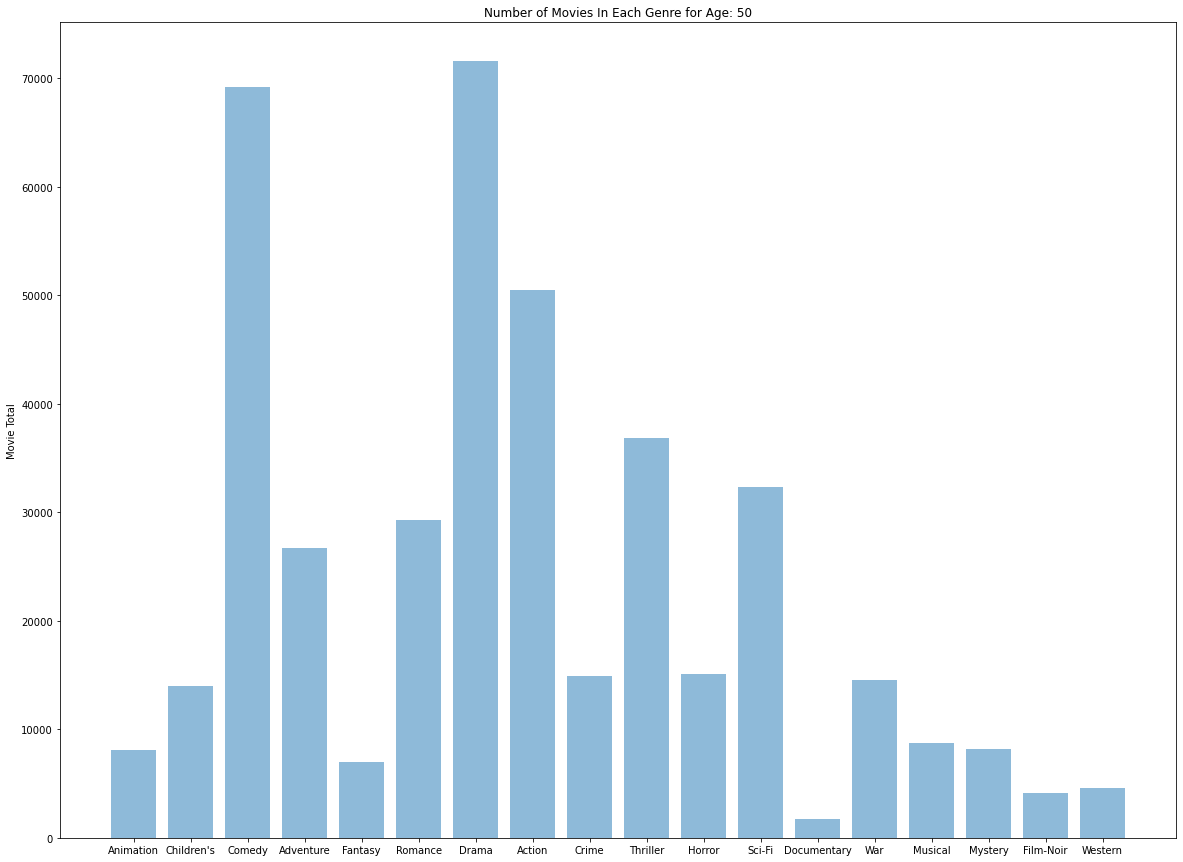

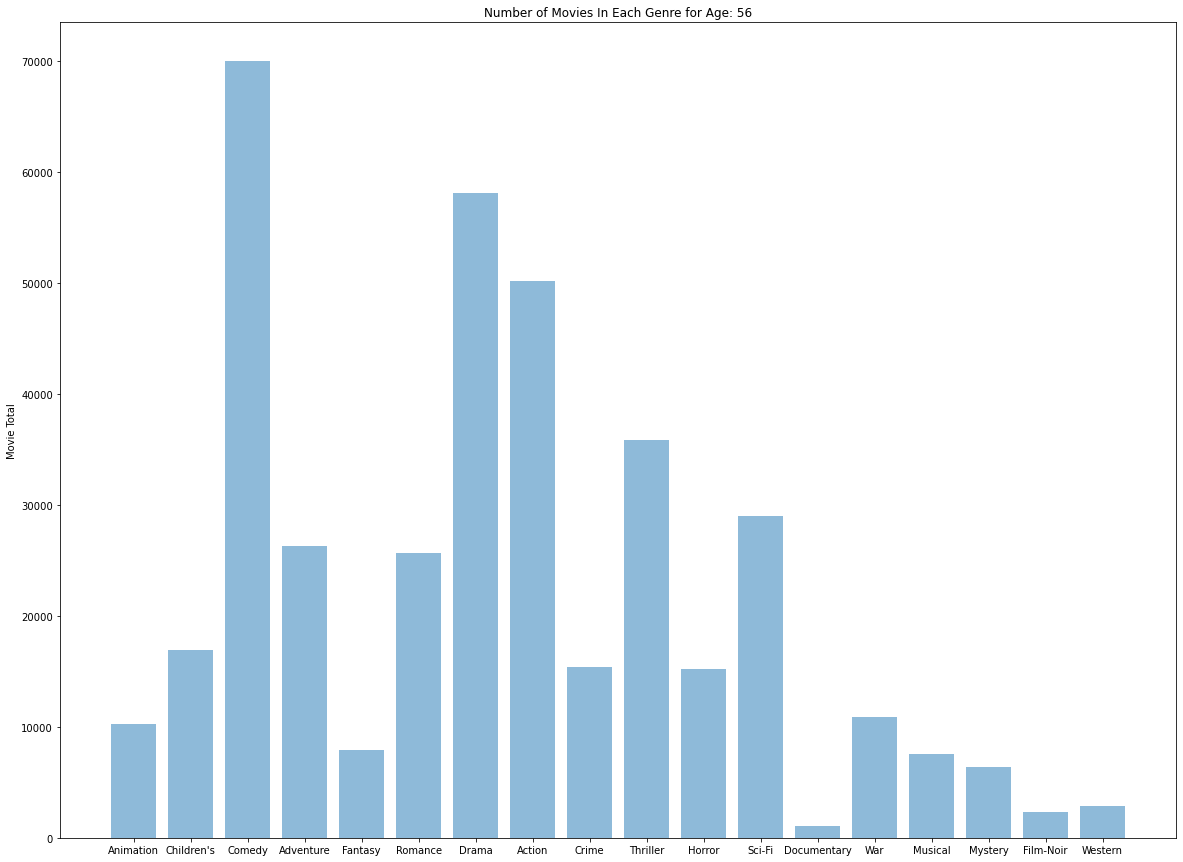

In [46]:
#Create a separate bar graph for each age group showing number of movies seen in each genre
for j in range(len(genres_watched_by_age)):
    movie_labels = ['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']
    totals = []
    for i in movie_labels:
        temp = genres_watched_by_age[i][j]
        totals.append(temp)
    y_pos = np.arange(len(movie_labels))

    #creates bar chart
    plt.figure(figsize=(20, 15))
    plt.bar(y_pos, totals, align='center', alpha=0.5)
    plt.xticks(y_pos, movie_labels)
    plt.ylabel('Movie Total')
    
    plt.title('Number of Movies In Each Genre for Age: ' + str(genres_watched_by_age['Age'][j]))

    plt.show()